# Predicting House Sale Prices

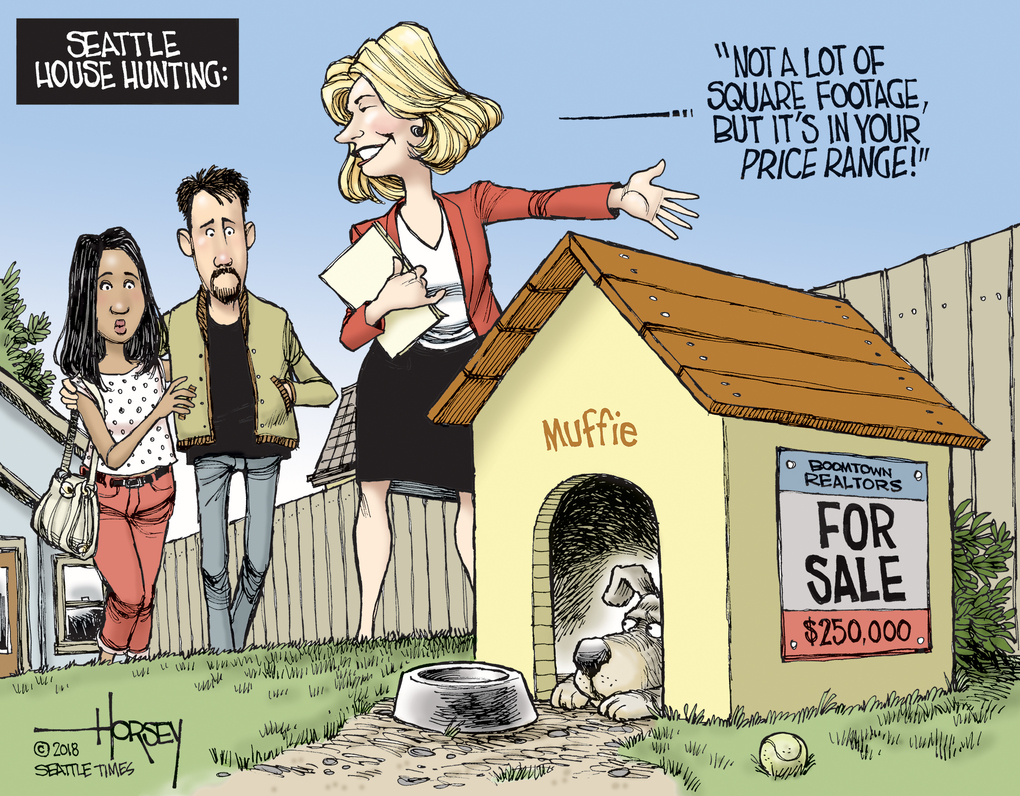

The goal of this project - predicting house price using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">Linear Regression</a> and  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge" target="_blank"> Ridge regression with Linear least squares with l2 regularization </a> methods from  <a href="https://scikit-learn.org/stable/index.html" target="_blank">scikit-learn</a>.

In this project I use original data from article <a href="https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627" target="_blank">Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project</a> by Dean De Cock, and use original dataset `AmesHousing.txt` and dictionary with descriptions attributes `DataDocumentation.txt` - you can download its from <a href="https://web.archive.org/web/20200802095935/http://jse.amstat.org:80/v19n3/decock/AmesHousing.txt" target="_blank">here</a> and <a href="https://web.archive.org/web/20201203235151/http://jse.amstat.org/v19n3/decock/DataDocumentation.txt" target="_blank"> here </a>.

I will not write many comments, all comments on the actions performed are inside the program code in cells.

**Caution**
Cross validation for determination optimal alphas for Ridge regression it takes a very long time.


## 1. Introduction

Load required modules and expore dataset. Print name of columns contains more than 5% NaN values, drop its and drops remain rows contain  NaN values in the dataset.

In [1]:
from IPython.display import display
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')  
pd.set_option('display.max_columns', None)
# pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

# Inspect dataset
# Open
ames = pd.read_csv("data/AmesHousing.txt",delimiter="\t")

# Get info about numbers  rows and columns

# Calculate NaN sum for each row
ames_nan_count = ames.isnull().sum()

display("ames contains {:,} and {:} columns.\n".format(
                                            ames.shape[0],
                                            ames.shape[1]))
# Print columns name with NaN more equal 5% and drop it

drop_columns = []

for i, feature in enumerate(ames_nan_count.index):
    nan = ames_nan_count[feature]
    nan_perc = nan/ames.shape[0]
    if nan_perc >= 0.05:
        drop_columns.append(feature)
        print ("row No ",  i+1 , ", row name ", feature,  
               f", NaN = {nan:,} or  % {nan_perc:.2%} from {ames.shape[0]:,} values.")


# Drop columns        
ames.drop(axis=1, columns = drop_columns, inplace = True)

# Check NaN values
display(ames.isnull().sum().sort_values(ascending = False).head(17))

# Drop NaN values and reset index
ames.dropna(axis = 0, inplace = True)
ames.reset_index(drop = True, inplace = True)

# Display number and object columns
number_columns =list(ames.select_dtypes(include = 'number'))
display(f"Numbers of numeric  columns = {len(number_columns):}" )
display(number_columns)

object_columns = list(ames.select_dtypes(include = 'object'))
display(f"Numbers  of object columns = {len(object_columns):}")
display(object_columns)

'ames contains 2,930 and 82 columns.\n'

row No  5 , row name  Lot Frontage , NaN = 490 or  % 16.72% from 2,930 values.
row No  8 , row name  Alley , NaN = 2,732 or  % 93.24% from 2,930 values.
row No  59 , row name  Fireplace Qu , NaN = 1,422 or  % 48.53% from 2,930 values.
row No  60 , row name  Garage Type , NaN = 157 or  % 5.36% from 2,930 values.
row No  61 , row name  Garage Yr Blt , NaN = 159 or  % 5.43% from 2,930 values.
row No  62 , row name  Garage Finish , NaN = 159 or  % 5.43% from 2,930 values.
row No  65 , row name  Garage Qual , NaN = 159 or  % 5.43% from 2,930 values.
row No  66 , row name  Garage Cond , NaN = 159 or  % 5.43% from 2,930 values.
row No  74 , row name  Pool QC , NaN = 2,917 or  % 99.56% from 2,930 values.
row No  75 , row name  Fence , NaN = 2,358 or  % 80.48% from 2,930 values.
row No  76 , row name  Misc Feature , NaN = 2,824 or  % 96.38% from 2,930 values.


Bsmt Exposure     83
BsmtFin Type 2    81
Bsmt Cond         80
Bsmt Qual         80
BsmtFin Type 1    80
Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Half Bath     2
Bsmt Full Bath     2
Garage Cars        1
Garage Area        1
BsmtFin SF 2       1
BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Gr Liv Area        0
dtype: int64

'Numbers of numeric  columns = 37'

['Order',
 'PID',
 'MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

'Numbers  of object columns = 34'

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

## 2. Feature engineering

In [2]:
# Define and print correlation absolute values to SalePrice column
sale_price_corr = ames.corr()["SalePrice"].\
    abs().sort_values(ascending=False)

# Display first 15 rows
print("Correlation Correlation matrix for “Price” column")
display(sale_price_corr.head(15))

# Define list dropped numeric columns with corr < 0.4
drop_numeric_col = list((sale_price_corr[sale_price_corr < 0.4]).index)

# Remain important information columns for further work
remain_numeric_col = ['Overall Qual','Overall Cond', 'Mo Sold','Yr Sold']
drop_numeric_col = list(set(drop_numeric_col) - set(remain_numeric_col))

# Drop weak correlation numeric columns
ames.drop(axis=1, columns = drop_numeric_col, inplace = True)
ames.reset_index(drop = True, inplace = True)

# Define interesting columns for categorial data with great equal than 10 unique values

object_columns_remain =[]
for value in object_columns:
    value_list = list(ames[value].unique())
    if len(value_list) >= 10:
        object_columns_remain.append(value)

# Define dropped categorial columns and drop it
object_columns_drop = list(set(object_columns) - set(object_columns_remain))
ames.drop(axis=1, columns = object_columns_drop, inplace = True)
ames.reset_index(drop = True, inplace = True)

# Convert name columns from camel snake to gouse snake
ames.columns = ames.columns.str.replace(r"(\B[A-Z])", r" \1").\
    str.lower().str.replace(r"\s", "_")
print("\nNew columns names")
display(ames.columns)

Correlation Correlation matrix for “Price” column


SalePrice         1.000000
Overall Qual      0.796838
Gr Liv Area       0.710706
Garage Cars       0.650823
Garage Area       0.640168
1st Flr SF        0.634411
Total Bsmt SF     0.634291
Full Bath         0.555271
Year Built        0.554442
Year Remod/Add    0.525983
Mas Vnr Area      0.506066
TotRms AbvGrd     0.505773
Fireplaces        0.469431
BsmtFin SF 1      0.420406
Wood Deck SF      0.321903
Name: SalePrice, dtype: float64


New columns names


Index(['neighborhood', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'exterior_1st', 'exterior_2nd', 'mas_vnr_area',
       'bsmt_fin_s_f_1', 'total_bsmt_s_f', '1st_flr_s_f', 'gr_liv_area',
       'full_bath', 'tot_rms_abv_grd', 'fireplaces', 'garage_cars',
       'garage_area', 'mo_sold', 'yr_sold', 'sale_type', 'sale_price'],
      dtype='object')

##  3. Feature Selection

,total_bsmt_s_f,1st_flr_s_f,gr_liv_area,tot_rms_abv_grd,garage_cars,garage_area
total_bsmt_s_f,NaN,0.888907,NaN,NaN,NaN,NaN
1st_flr_s_f,0.888907,NaN,NaN,NaN,NaN,NaN
gr_liv_area,NaN,NaN,NaN,0.809675,NaN,NaN
tot_rms_abv_grd,NaN,NaN,0.809675,NaN,NaN,NaN
garage_cars,NaN,NaN,NaN,NaN,NaN,0.887869
garage_area,NaN,NaN,NaN,NaN,0.887869,NaN


0.0       5.033676
576.0     3.403049
440.0     3.367600
484.0     2.587735
240.0     2.375044
            ...   
815.0     0.035448
1043.0    0.035448
1184.0    0.035448
876.0     0.035448
428.0     0.035448
Name: garage_area, Length: 598, dtype: float64

2.0    54.696916
1.0    26.692662
3.0    13.009571
0.0     5.033676
4.0     0.531726
5.0     0.035448
Name: garage_cars, dtype: float64

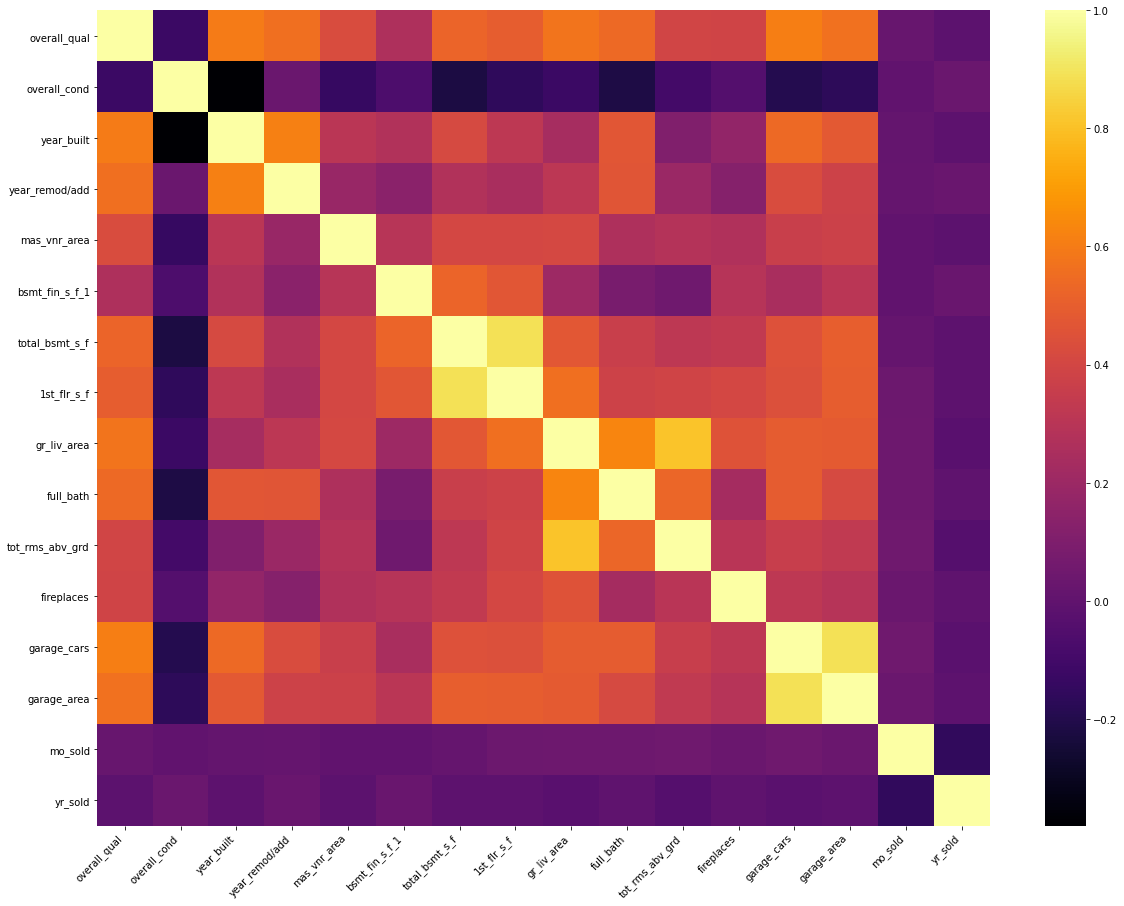

In [3]:
# Check coolineary features except prise  with heatmap as hm
fig = plt.figure(figsize = (20,15))
hm = sns.heatmap(ames.select_dtypes(include = 'number').iloc[:, :-1].corr(),
                 cmap = 'inferno')
hm.set_xticklabels(hm.get_xticklabels(), rotation = 45, horizontalalignment='right');

# Create correlation matrix and extract values > 0.7
collinear = ames.select_dtypes(include = 'number').iloc[:, :-1].corr()
collinear = collinear[(collinear < 1) & (collinear > 0.7)]

# Delete NaN columns and rows 
collinear.dropna(axis = 1, thresh = 1, inplace = True)
collinear.dropna(axis = 0, thresh = 1, inplace = True)
display(collinear)


# Selecting practical business features
# check garage_area in percent
display(ames.garage_area.value_counts(normalize = True)*100)

# check garage_cars
display(ames.garage_cars.value_counts(normalize = True)*100)

# Transform year_built, year remod, mo_sold and yr_sold
ames["year_built"] = ames.yr_sold\
                                - ames.year_built
ames["year_remod/add"] = ames.yr_sold\
                                - ames["year_remod/add"]

# define list columns for drop numerical columns exclude columns 'gr_liv_area'
drop_numeric_columns_final = ['mas_vnr_area', 'bsmt_fin_s_f_1', 'total_bsmt_s_f',
                              '1st_flr_s_f', 'full_bath', 'tot_rms_abv_grd',
                              'fireplaces', 'garage_cars', 'garage_area', "mo_sold"]

#Drop defined numerical columns
ames = ames.copy().\
    drop(axis=1, columns=drop_numeric_columns_final)
ames.reset_index(drop=True, inplace=True)


## 4.  Train and test using LinearRegression with Ordinary Least Squares and OneHotEncoder and RobustScaler encoder

It is known that <a href="https://datacadamia.com/data_mining/least_square#scale-invariant" target="_blank">Standard least squares</a> is scale-invariant  for scaling, conduct an experiment using different encoding of different columns.
First - display dispersion numerical values.

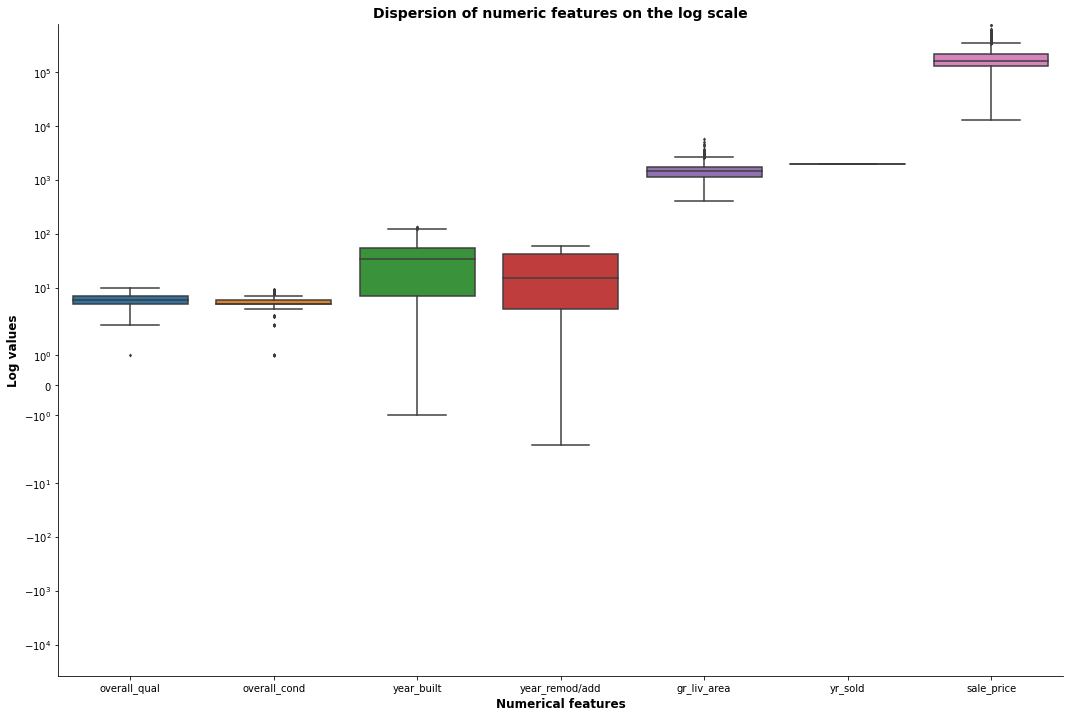

In [4]:
# Create plot for numerical values for  analyzing dispersions and outliers
numerical_columns =list(ames.select_dtypes(include = ['number']))
fig, ax = plt.subplots(figsize = (18, 12))
ax = sns.boxplot(data = ames[numerical_columns], fliersize = 2)
ax.set_yscale('symlog')
ax.set_xlabel("Numerical features", fontsize = 12, weight = "bold")
ax.set_ylabel("Log values", fontsize = 12, weight = "bold")
ax.set_title("Dispersion of numeric features on the log scale", fontsize = 14,
             weight = "bold")
ax.spines[['top', 'right']].set_visible(False)


#  Choice robust encoder for numerical  and onehot encoder for categorical data
# Prepare datset for robust and oneh
# Reorder columns for further encoding in order numerical -> categorial ->price
old_columns = ames.columns
new_columns = ['gr_liv_area', 'year_built', 'year_remod/add', 'overall_qual', 
               'overall_cond','yr_sold', 'neighborhood', 'exterior_1st', 
               'exterior_2nd', 'sale_type', 'sale_price']
ames = ames.reindex(columns = new_columns)
# Make copy for ploting real values on scatter plot
ames_cp = ames.copy()

# Final datset before encoding contains 6 numerical and 5 categorial features

# Encode categorical data - insert new columns and filling values OnHot encoder
categories =list(ames.select_dtypes(include = 'object'))

# Define number inserting columns
new_cats = 0
for cat in categories:
    lenght = len(ames[cat].unique())
    new_cats += lenght

# Insert new columns for future OneHotEncoder coding
for k  in range(1, new_cats +1):
    first_col = ames.columns.get_loc("sale_type")
    col_name = "ohe_" + str(k)
    ames.insert(first_col + k, "ohe_" + str(k), 0)

# Encode categorial values and fill new columns before split dataset
ohe = OneHotEncoder(sparse = False)
ames.iloc[:, first_col + 1:-1] = ohe.fit_transform(ames[categories])

# Encode x columns before split
rb_enc_X = RobustScaler()
ames.iloc[:,:6] = rb_enc_X.fit_transform(ames.iloc[:,:6])

# Encode sale price column on Robust scaler before split dataset
rb_enc_y = RobustScaler()
ames.iloc[:, [-1]] = rb_enc_y.fit_transform(ames.iloc[:, [-1]])

# Remove object columns
ames = ames.select_dtypes(include = 'number')


# Split dataset using standard sklearn.model_selection.train_test_split
# XY, X, Y - train datasets or columns, xy, x, y - test datasets or columns
ames_XY, ames_xy = train_test_split(ames, test_size=0.5, random_state=42)

# Separate X, x and Y, Y columns  for train, predict and comparision
ames_X = ames_XY.iloc[:, :-1]
ames_Y = ames_XY.iloc[:, [-1]]
ames_x = ames_xy.iloc[:, :-1]
ames_y = ames_xy.iloc[:, [-1]] 


# Create list of features X from one to ten as list of lists [[feature1],
# [feature1, feature2], [etc...]]

columns = list(ames.columns)
# ft_X - features list of lists
ft_X = []
for i, col in enumerate(columns[:7]):
    if i <= 5:
        ft_X.append(list(columns[0:i+1]))
    else:
        ft_X.append(columns[:-1])
         
# Collect  data for further creating dataframe lr_df - linear regression data
lr_d = []
# For plotting predicted price as function of square
square_x = 0
price_y = 0

# train models and extract values for lr_d and plotting

for i, f_X in enumerate(ft_X):
        
    # row for appending lr_d
    row = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    if i <= 5:
        row[0] = str(len(f_X)) + " features"
    if i > 5:
        row[0] = "all ten features"
    
    # Create linear regression instance
    lin_reg = LinearRegression(copy_X=True)
    lin_reg.fit(ames_X[f_X], ames_Y)
    
    # Predict y
    pred_y_enc = lin_reg.predict(ames_x[f_X])
    pred_y = rb_enc_y.inverse_transform(pred_y_enc)
    # Extract x and y values for plot predict line for square
    if i == 0:
        # Manual decode square 
        square_x = ames_x[f_X] * rb_enc_X.scale_[0]+ rb_enc_X.center_[0]
        price_y = pred_y
        coef = lin_reg.coef_.reshape(-1,1)[0]
        # Calculate real b by formula b = coef * scale_y /scale_X
        b = round(coef[0] * rb_enc_y.scale_[0]/rb_enc_X.scale_[0], 3)
        row[i+1] = b
        # Calculate real slope c by formula c = mean(y) - b * mean (x)  
        c = round((price_y.mean() - b * square_x.mean()[0]), 2)
        row[7] = c    
    # Calculate coef and intersects for features from 2 to 6
    elif i !=0 and i <= 5:
        coef = lin_reg.coef_
        for i, val in enumerate(coef[0]):
            # Calculate real b = coef * scale_y /scale_X
            b = round(val* rb_enc_y.scale_[0]/rb_enc_X.scale_[i], 3)
            row[i+1] = b
        # Calculate real slope c = mean(y) - b(j) * mean(x[j]) 
        y_mean = pred_y.mean()
        for i in range(0,len(coef[0])):
            c = y_mean - (ames_X.iloc[:,i]*rb_enc_X.scale_[i] + rb_enc_X.center_[i]).\
                mean() * row[i+1]
        row[7] = round(c,2)
    # Calculate RMSE R2 for all features
    y = rb_enc_y.inverse_transform(ames_y)
    r2 = r2_score(pred_y, y)
    row[-2] = round(r2, 3)
    rmse = mean_squared_error(y, pred_y, squared=False)
    row[-1] = round(rmse, 2)
    lr_d.append(row)    

# Create dataframe lr_data
lr_col = ["x[features]", "b_1", "b_2",	"b_3", "b_4", "b_5","b_6",
               "intercept",	"r_2", "rmse"]
lr_df = pd.DataFrame(lr_d, columns = lr_col)

Cross validate data from model

In [5]:
# create a KFold object with 10 splits for cross validation ames dataset 
# with robust encoder from 1 to 6 columns
ames_lr_cv_X = ames_cp.iloc[:, :6]
ames_lr_cv_y = ames_cp.iloc[:, [-1]]
lin_reg_scores = []
for i, f_X in enumerate(ft_X[:-1]):
    # row for appending scores
    row_score = [0, 0, 0, 0, 0]
    row_score[0] = str(len(f_X)) + " features"
    folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
    lr_scores = cross_val_score(lin_reg, ames_lr_cv_X[f_X], ames_lr_cv_y, 
                                    scoring="neg_root_mean_squared_error", cv=folds)
    row_score[1] = round(np.min(-lr_scores), 2)
    row_score[2] = round(np.max(-lr_scores), 2)
    row_score[3] = round(np.mean(-lr_scores), 2)
    row_score[4] = round(np.std(-lr_scores), 2)
    lin_reg_scores.append(row_score)
lr_scores_df = pd.DataFrame(lin_reg_scores, columns = ["features[x]",	"min_score", 
                                         "max_score", "mean_score",	"std_score"])

Plott predicted values.

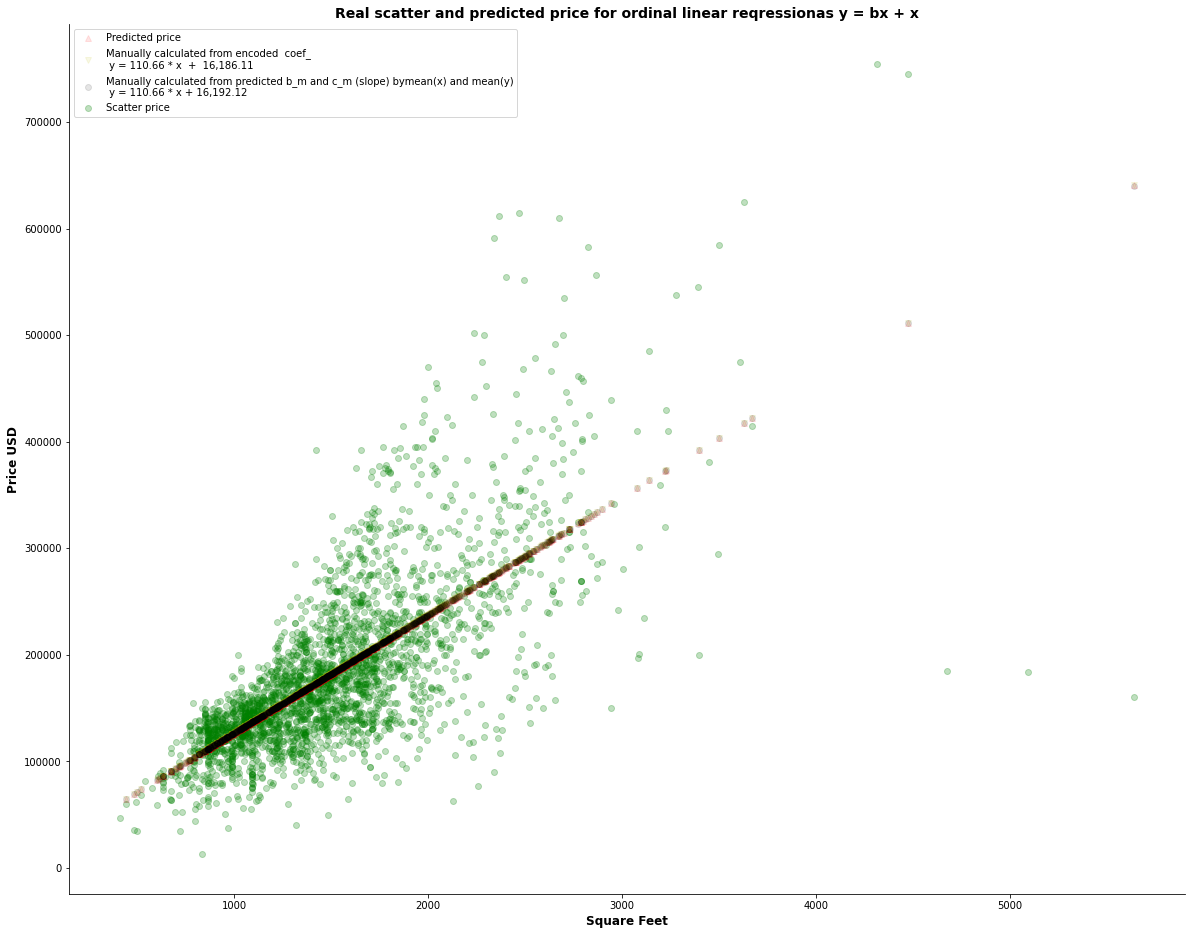

In [6]:
# visualization data by x = ground living area  and y =  price
fig, ax  = plt.subplots(figsize = (20, 16))
ax.scatter(ames_cp.iloc[:, 0].values, ames_cp.iloc[:,-1].values, c = "g", 
           label = "Scatter price", alpha = 0.25)

b = lr_df.iloc[0,1]
c = lr_df.iloc[0,7] 
# Predicted price line
ax.plot(square_x, price_y, "r^", alpha = .1, label = "Predicted price")

# Manually calculated b and c from encode data 
ax.plot(square_x, b * square_x + c, "yv", alpha = .1, 
        label = "Manually calculated from encoded  coef_\
\n y = {:.2f} * x  +  {:,.2f}".format(b, c) )

# Calculate b_m  manually -> b_m = sum((x -x(mean)*(y - y(mean))/sum(x-x(mean))^2)
b_m = round(np.sum((price_y - np.mean(price_y))*(square_x - np.mean(square_x))) \
    /np.sum((square_x - np.mean(square_x))**2), 2)
# Calculate c_m manually -> c_m = mean(y) - b * mean(x)
c_m = np.mean(price_y) - b_m*(np.mean(square_x))
ax.plot(square_x, b_m * square_x + c_m, "ko", alpha = .1, 
        label = "Manually calculated from predicted b_m and c_m (slope) by\
mean(x) and mean(y)\n y = {:.2f} * x + {:,.2f}".format(b_m[0], c_m[0])  )

ax.set_ylabel("Price USD", fontsize = 12, weight = "bold", rotation = 90)
ax.set_xlabel("Square Feet", fontsize = 12, weight = "bold")
ax.set_title("Real scatter and predicted price for ordinal linear reqression\
as y = bx + x",
             fontsize = 14, weight = "bold")
ax.spines[['top', 'right']].set_visible(False)
ax.legend()
plt.show()

In [7]:
display(lr_df)

,x[features],b_1,b_2,b_3,b_4,b_5,b_6,intercept,r_2,rmse
0,1 features,110.664,0.000,0.000,0.000,0.000,0.000,16186.11,-0.049,5.633196e+04
1,2 features,96.374,-1080.739,0.000,0.000,0.000,0.000,220219.98,0.497,4.616664e+04
2,3 features,92.170,-862.769,-535.947,0.000,0.000,0.000,194315.22,0.515,4.528616e+04
3,4 features,62.209,-441.720,-227.791,24767.854,0.000,0.000,29300.01,0.671,3.916151e+04
4,5 features,65.351,-615.973,-72.280,23812.376,6127.955,0.000,147051.49,0.679,3.906323e+04
5,6 features,65.380,-617.395,-72.535,23801.485,6122.209,427.329,-676677.17,0.679,3.906698e+04
6,all ten features,0.000,0.000,0.000,0.000,0.000,0.000,0.00,-0.001,1.322992e+15


**Conclusion:**

It can be seen that an increase in the amount of features with the same encoding data reduces the value RMSE, but when the model uses data with different encoding, the value RMSE  increases. It is also clear from the cross validation that the absolute values RMSR of more than two features with same encoding are approximately equal to the expected ones, but the value RMSE are far from the expected ones. The “b” (slope coefficient) of a straight line visually corresponds to an optimally equidistant line from all points. The values R2 are far from the theoretically calculated by cross validation. Manual conversion of the “b” (slope coefficient) from model.coef_ and Robust encoder scale are correct and corresponds to the predicted values.

## 5.  Ridge regression with OrdinalEncoder and RobustScaler encoders

Formally, in the **p.p 6.2.1** <a href="https://datacadamia.com/data_mining/ridge_regression#standardized_coefficients_versus_lambda" target="_blank">As a result, it's important to standardize the predictors before applying ridge regression</a>. For the sake of experiment,  encode all the data by  OrdinalEncoder() categorical columns, after encode all columns by   RobustScaler().



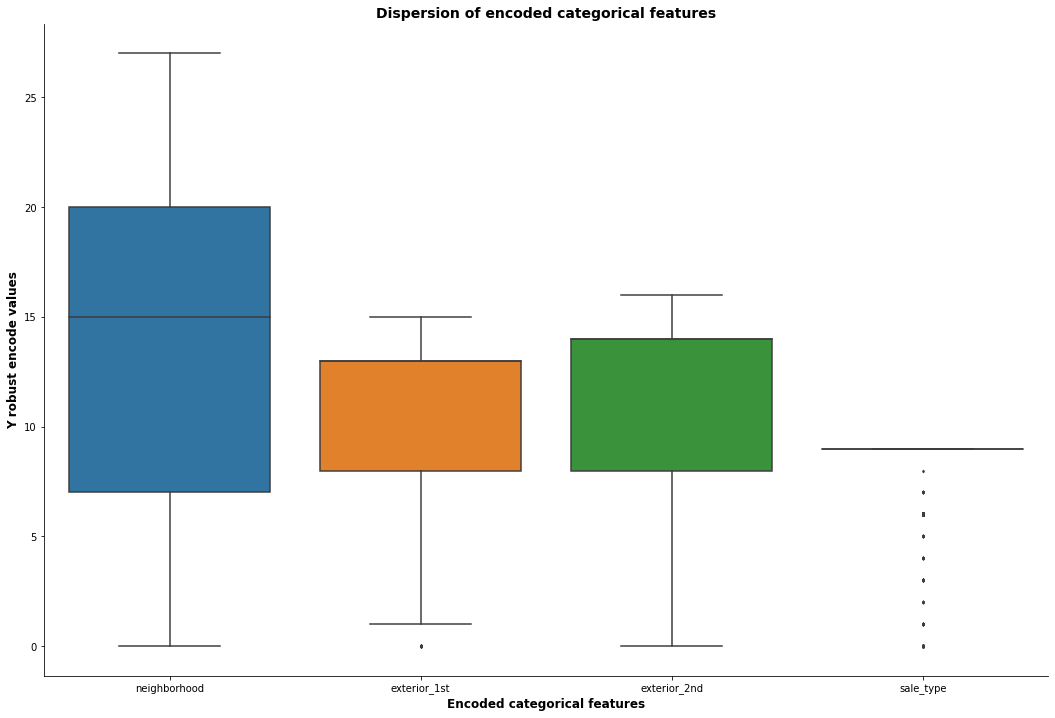

In [8]:
ridge = ames
# insert new columns for decode from OneHotEncoder 
for  i, cat  in enumerate(categories):
    ridge.insert(5 + i + 1, cat, 0)

# decode categorical data    
ridge.iloc[:,6:10] = ohe.inverse_transform(ridge.iloc[:,10:-1])

# Drop OneHot encoder columns
r_del = ridge.columns[10:81]
ridge.drop(labels =r_del, axis=1, inplace = True)

# Encode categorical data ordinal encoder
ord_enc = OrdinalEncoder()
ridge.iloc[:, 6:10] = ord_enc.fit_transform(ridge.iloc[:, 6:10])

# Check dispersions encoding categorical data
fig, ax = plt.subplots(figsize = (18, 12 ))
ax = sns.boxplot(data = ridge.iloc[:, 6:10], fliersize = 2)
ax.set_xlabel("Encoded categorical features", fontsize = 12, weight = "bold")
ax.set_ylabel("Y robust encode values", fontsize = 12, weight = "bold")
ax.set_title("Dispersion of encoded categorical features", fontsize = 14,
             weight = "bold")
ax.spines[['top', 'right']].set_visible(False)
plt.show()

Encoding all data by RobustScaler() and find optimal alpha values for sets of features using cross validation.

In [9]:
# Encode encoded categorical data Robust encoder
rb_enc_X_cat = RobustScaler()
ridge.iloc[:, 6:10] = rb_enc_X_cat.fit_transform(ridge.iloc[:, 6:10])

# Split dataset using standard sklearn.model_selection.train_test_split
# XY, X, Y - train datasets or columns, xy, x, y - test datasets or columns
ridge_XY, ridge_xy = train_test_split(ridge, test_size=0.5, random_state=42)

# Separate X, x and Y, Y columns  for train, predict and comparison
ridge_X = ridge_XY.iloc[:, :-1]
ridge_Y = ridge_XY.iloc[:, [-1]]
ridge_x = ridge_xy.iloc[:, :-1]
ridge_y = ridge_xy.iloc[:, [-1]] 

# Prepare list of features 
# Create list of features X from one to ten as list of lists [[feature1],
# [feature1, feature2], [etc...]]

rid_col = list(ridge_X.columns)
# rft_X - features list of lists
rft_X = []
for i, col in enumerate(rid_col[:]):
    if i <= 5:
        rft_X.append(list(rid_col[0:i+1]))
    else:
        rft_X.append(rid_col[:])
        break

# Cross validation for optimal alpha values for features
# define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define optimal alphas by ‘neg_root_mean_squared_error’ metric
ridge_alphas = []
for feat in rft_X:
    #define model for roughly alphas
    r_alpha = RidgeCV(alphas=np.logspace(-2, 2, num = 100 ), cv=cv, 
                      scoring="neg_root_mean_squared_error")
    # fit model
    r_alpha.fit(ridge[feat], ridge.iloc[:,[-1]])
    # append alpha that produced the lowest test RMSE
    ridge_alphas.append(r_alpha.alpha_)
# Round for three numbers after dot
ridge_alphas = np.around(ridge_alphas, decimals = 3)

Display ridge alha for features 1 to 6

In [10]:
ridge_alphas

array([ 3.199,  2.656,  6.136,  7.391,  4.642,  5.094, 10.723])

Train model and display predicted line and calculated `b(slope)` and `c(intersect)`.

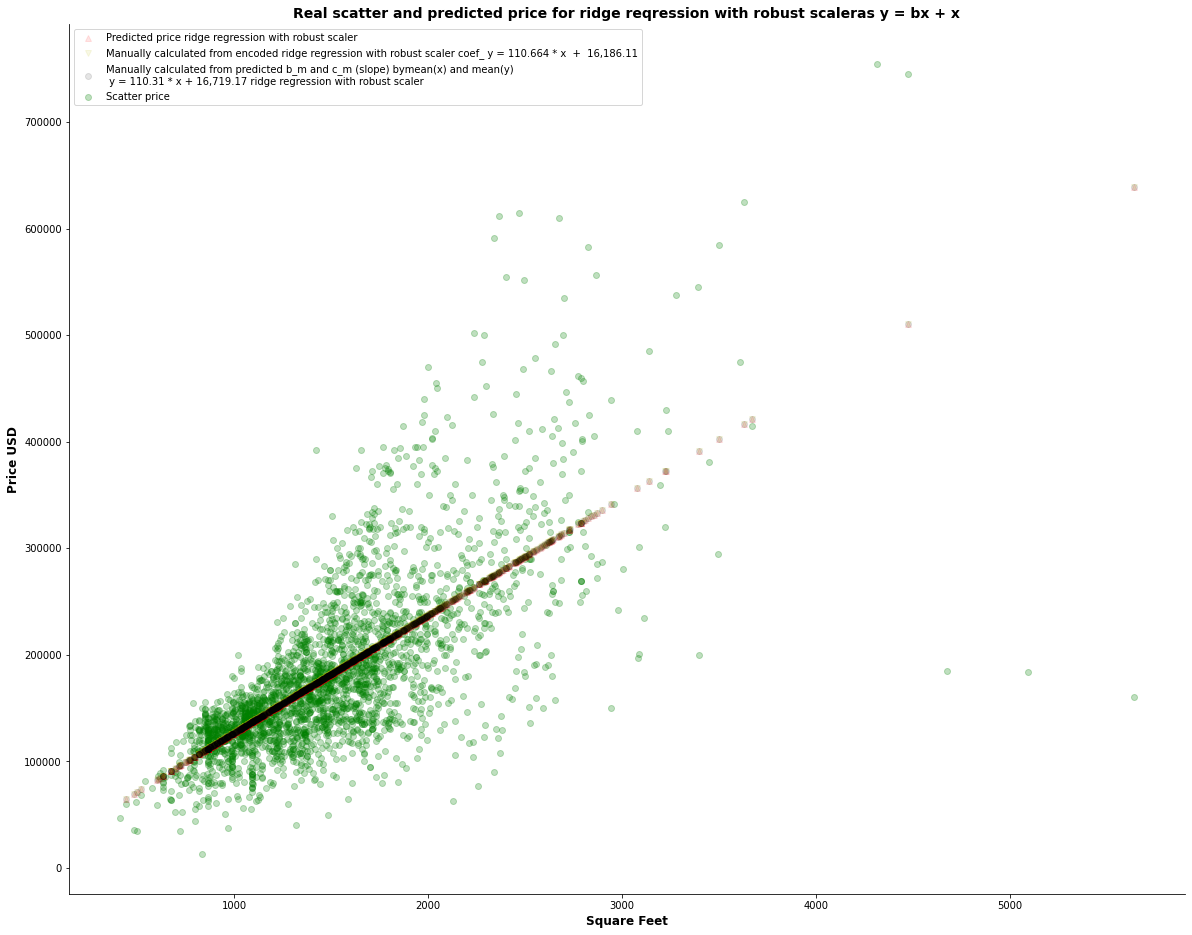

In [11]:
# train models and extract values for rr_d and plotting
rdg_d = []
for i, rf_X in enumerate(rft_X):
    # row for appending rdg_d
    r_row = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    if i <= 5:
        r_row[0] = str(len(rf_X)) + " features"
    else:
        r_row[0] = "all ten features"
    
    # Create linear regression instance 
    ridge_reg = Ridge(alpha = ridge_alphas[i])
    ridge_reg.fit(ridge_X[rf_X], ridge_Y)
    
    # Predict y
    rdg_yp = rb_enc_y.inverse_transform(ridge_reg.predict(ridge_x[rf_X]))
    # Extract x and y values for plot predict line for square
    if i == 0:
        # Manual decode square 
        rdg_square_x = ridge_x[rf_X] * rb_enc_X.scale_[0]+ rb_enc_X.center_[0]
        rdg_price_y = rdg_yp
        rdg_coef = ridge_reg.coef_.reshape(-1,1)[0]
        # Calculate real b by formula b = coef * scale_y /scale_X
        rdg_b = round(rdg_coef[0] * rb_enc_y.scale_[0]/rb_enc_X.scale_[0], 3)
        r_row[i+1] = rdg_b
        # Calculate real slope c by formula c = mean(y) - b * mean (x)  
        rdg_c = round((rdg_price_y.mean() - rdg_b * rdg_square_x.mean()[0]), 2)
        r_row[7] = rdg_c
        r_row[-1] = ridge_alphas[i] 
    # Calculate coefficient "b" and intersects "c" for features from 2 to 6
    # using coef_ from Ridge model
    elif i !=0 and i <= 5:
        rdg_coef = ridge_reg.coef_
        for i, val in enumerate(rdg_coef[0]):
            # Calculate real b = coef * scale_y /scale_X
            rdg_b = round(val* rb_enc_y.scale_[0]/rb_enc_X.scale_[i], 3)
            r_row[i+1] = rdg_b
        # Calculate real slope c = mean(y) - b(j) * mean(x[j]) 
        rdg_y_mean = rdg_yp.mean()
        for i in range(0,len(rdg_coef[0])):
            rdg_c = rdg_y_mean - (ridge_X.iloc[:,i]*rb_enc_X.scale_[i] + rb_enc_X.center_[i]).\
                mean() * r_row[i+1]
        r_row[7] = round(rdg_c,2)
        r_row[-1] = ridge_alphas[i] 
    # Calculate RMSE R2 for all features
    rdg_y_test = rb_enc_y.inverse_transform(ridge_y)
    r2 = r2_score(ridge_y, rdg_yp, y)
    r_row[-3] = round(r2, 3)
    rmse = mean_squared_error(ridge_y, rdg_yp, squared=False)
    r_row[-2] = round(rmse, 2)
    rdg_d.append(r_row)
    r_row[-1] = ridge_alphas[i]     

# Create dataframe rgd_data
rdg_col = ["x[features]", "b_1", "b_2",	"b_3", "b_4", "b_5","b_6",
               "intercept",	"r_2", "rmse", "alpha"]
rdg_df = pd.DataFrame(rdg_d, columns = rdg_col)

# visualization data by x = ground living area  and y =  price
fig, ax  = plt.subplots(figsize = (20, 16))
ax.scatter(ames_cp.iloc[:, 0].values, ames_cp.iloc[:,-1].values, c = "g", 
           label = "Scatter price", alpha = 0.25)

rdg_b = rdg_df.iloc[0,1]
rdg_c = rdg_df.iloc[0,7] 
# Pppt predicted price line
ax.plot(rdg_square_x, rdg_price_y, "r^", alpha = .1, label = "Predicted price \
ridge regression with robust scaler ")

# Manually calculated "b" and "c" from encoded data 
ax.plot(rdg_square_x, rdg_b * rdg_square_x + rdg_c, "yv", alpha = .1, 
        label = "Manually calculated from encoded ridge regression with \
robust scaler coef_ y = {} * x  +  {:,}".format(b, c))

# Calculate b_m  manually -> b_m = sum((x -x(mean)*(y - y(mean))/sum(x-x(mean))^2)
# for graphical validation
rdg_b_m = round(np.sum((rdg_price_y - np.mean(rdg_price_y))\
                        * (rdg_square_x - np.mean(rdg_square_x)))\
    /np.sum((rdg_square_x - np.mean(rdg_square_x))**2), 2)

# Calculate c_m manually -> c_m = mean(y) - b * mean(x) for graphical validation
rdg_c_m = np.mean(rdg_price_y) - rdg_b_m*(np.mean(rdg_square_x))
ax.plot(rdg_square_x, rdg_b_m * rdg_square_x + rdg_c_m, "ko", alpha = .1, 
        label = "Manually calculated from predicted b_m and c_m (slope) by\
mean(x) and mean(y)\n y = {:.2f} * x + {:,.2f} ridge regression with robust scaler".\
    format(rdg_b_m[0], rdg_c_m[0]))

ax.set_ylabel("Price USD", fontsize = 12, weight = "bold", rotation = 90)
ax.set_xlabel("Square Feet", fontsize = 12, weight = "bold")
ax.set_title("Real scatter and predicted price for ridge reqression with robust scaler\
as y = bx + x",
             fontsize = 14, weight = "bold")
ax.spines[['top', 'right']].set_visible(False)
ax.legend()
plt.show()

display data from Ridge model with RobustScalar()

In [12]:
display(rdg_df)

,x[features],b_1,b_2,b_3,b_4,b_5,b_6,intercept,r_2,rmse,alpha
0,1 features,110.308,0.000,0.000,0.000,0.000,0.000,16722.17,-3.026080e+10,190290.19,3.199
1,2 features,96.173,-1076.394,0.000,0.000,0.000,0.000,220068.61,-3.246248e+10,192707.69,2.656
2,3 features,91.666,-853.364,-540.496,0.000,0.000,0.000,194432.97,-3.254385e+10,192955.27,6.136
3,4 features,62.152,-440.910,-236.884,24444.891,0.000,0.000,31297.10,-3.366741e+10,193889.47,7.391
4,5 features,65.162,-607.122,-86.481,23666.505,5976.263,0.000,147917.67,-3.370018e+10,193897.81,4.642
5,6 features,65.171,-607.643,-88.074,23642.355,5956.022,416.128,-654168.02,-3.369886e+10,193899.75,5.094
6,all ten features,0.000,0.000,0.000,0.000,0.000,0.000,0.00,-3.379141e+10,194120.91,10.723


**Conclusion**
In case the Ridge model with RobustScalar() encoding I have only one reliable parameter - `b1` slope. RMSE and R2 values - as we say - confusion instead of music. It can be seen that when you can not use RobustScalar() encode in this case for Ridge regression.

## 6. Ridge regression with StandardScaler encoder

Encode all (numerical and categorical after encoding OrdinalEncoder) data with StandardScaler encoder and find optimal values with cross validation. For finding optimal alpha values for Ridge regression always use RMSE, becouse R2 always will  be almost equal to each other with a value of both 0.001 and 1,000 and always show the maximum value of the tested interval during cross validation. 

In [13]:
# assign dataset values from copy cleaned dataset with raw values
rd_std = ames_cp

# Encode categorical data with ordinal encoder
rd_ord_enc = OrdinalEncoder()
rd_std.iloc[:, 6:10] = rd_ord_enc.fit_transform(rd_std.iloc[:, 6:10])

# define dataset for cross  validation
rd_std_cv_X = rd_std.iloc[:, :-1]
rd_std_cv_y = rd_std.iloc[:, [-1]]

# Define encoders   for cross validation dataset
rd_std_enc_cv_X = StandardScaler()
rd_std_enc_cv_y = StandardScaler()

# Encode  cross validation dataset
rd_std_cv_X.iloc[:, :-1] = rd_std_enc_cv_X.fit_transform(rd_std_cv_X.iloc[:, :-1])
rd_std_cv_y.iloc[:, [-1]] = rd_std_enc_cv_y.fit_transform(rd_std_cv_y.iloc[:, [-1]])

# Split data set 50:50 - X, Y - train data, x, y -test data
rd_std_X, rd_std_x, rd_std_Y, rd_std_y = train_test_split(rd_std.iloc[:, :-1],
                                                          rd_std.iloc[:, [-1]], 
                                                          test_size=0.5,
                                                          random_state=42)

# Prepare list of features 
# Create list of features X from one to ten as list of lists [[feature1],
# [feature1, feature2], [etc...]]
rd_std_col = list(rd_std_X.columns)
rd_std_features = []
for i, col in enumerate(rd_std_col[:]):
    if i <= 5:
        rd_std_features.append(list(rd_std_col[0:i+1]))
    else:
        rd_std_features.append(rd_std_col[:])
        break

# Cross validation for optimal alpha  for each feature
rd_std_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define optimal alphas by ‘neg_root_mean_squared_error’ metric
rd_std_alphas = []
for rd_std_feat in rd_std_features:
    rd_std_alpha = RidgeCV(alphas=np.logspace(-1, 2, num = 150 ), cv = rd_std_cv, 
                      scoring="neg_root_mean_squared_error")
    # fit model
    rd_std_alpha.fit(rd_std_cv_X[rd_std_feat], rd_std_cv_y)
    # append alpha that produced the lowest test RMSE
    rd_std_alphas.append(rd_std_alpha.alpha_)

# Round for three numbers after dot
rd_std_alphas = np.around(rd_std_alphas, decimals = 3)

display alpha for StandardScaler encoder

In [14]:
rd_std_alphas

array([ 4.912,  5.645,  8.568, 11.316,  7.456,  8.18 , 16.397])

It can be seen that the alpha values  for RobustScaler are differ that alpha values from the values for StandardScaler. 

During the preparation of this project  there discovered the problem with determining the correct values `b(slope)` and `c(intersect)` , let's look at its in more detail.

## 6.1 Train Ridge regression model with optimal alpha and  coef_ taken from  model using  StandardScaler


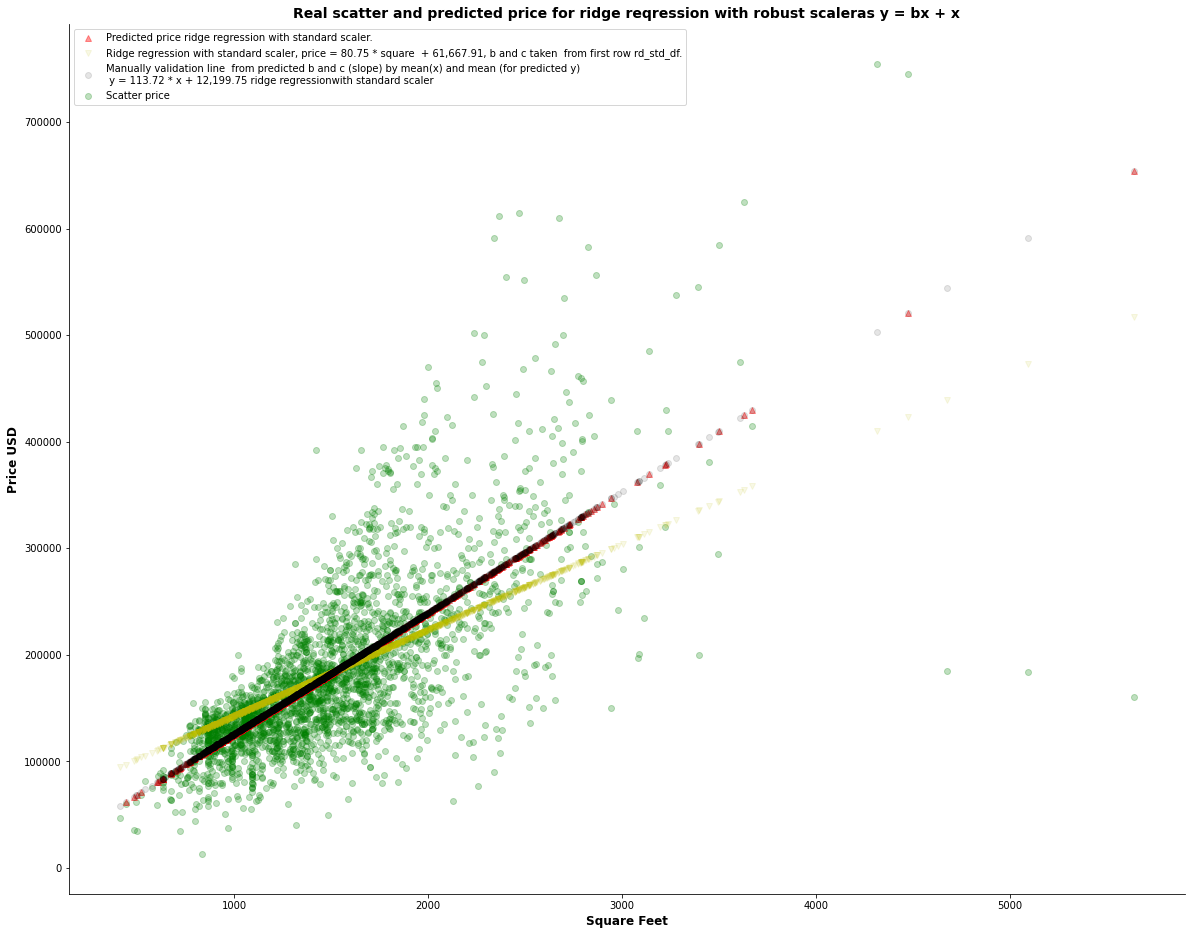

In [15]:
# train models and extract values for rd_std and plotting
rd_std_d = []
# rd_std_square_X
rd_std_square_x = 0
# rd_std_pred_price_y
rd_std_pred_price_y = 0

for i, rd_std_feat in enumerate(rd_std_features):
    # row for appending rd_std_d
    r_row = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    if i <= 5:
        r_row[0] = str(len(rd_std_feat)) + " features"
    else:
        r_row[0] = "all ten features"
    
    # Encode X, Y and x 
    rd_std_enc_X = StandardScaler()
    rd_std_X[rd_std_feat] = rd_std_enc_X.fit_transform(rd_std_X[rd_std_feat])
    
    rd_std_enc_x = StandardScaler()
    rd_std_x[rd_std_feat] = rd_std_enc_x.fit_transform(rd_std_x[rd_std_feat])
    
    rd_std_enc_Y = StandardScaler()
    rd_std_Y =  rd_std_enc_Y.fit_transform(rd_std_Y)
    
    rd_std_enc_y = StandardScaler()
    rd_std_y =  rd_std_enc_y.fit_transform(rd_std_y)
    
    # Create ridge regression instance 
    rd_std_ridge = Ridge(alpha = rd_std_alphas[i])
    rd_std_ridge.fit(rd_std_X[rd_std_feat], rd_std_Y)
    
    # predict y and decode 
    rd_std_y_pred = rd_std_enc_Y.\
        inverse_transform(rd_std_ridge.predict(rd_std_x[rd_std_feat]))
    # Decode back X, Y and x, y
    rd_std_X[rd_std_feat] = rd_std_enc_X.inverse_transform(rd_std_X[rd_std_feat])
    rd_std_Y = rd_std_enc_Y.inverse_transform(rd_std_Y)
    rd_std_x[rd_std_feat] = rd_std_enc_x.inverse_transform(rd_std_x[rd_std_feat])
    rd_std_y = rd_std_enc_y.inverse_transform(rd_std_y)
    
    # Extract values for plot predicted line, "b" and "c" and fill first row dataframe
    if i == 0:
        coef_i0 = rd_std_ridge.coef_[0][0]
        rd_std_square_x = rd_std_x[rd_std_feat].values 
        rd_std_pred_price_y = rd_std_y_pred
        b_1 = round(np.std(coef_i0 * rd_std_pred_price_y)\
                      /np.std(rd_std_square_x), 3)
        r_row[i+1] = b_1
        c_1 = np.mean(rd_std_pred_price_y) - b_1*np.mean(rd_std_square_x)
        r_row[7] = c_1
    # Fill rows from two to six
    if i > 0 and i <= 5:
        rd_std_coef = rd_std_ridge.coef_
        for i, val in enumerate(rd_std_coef[0]):
            # Calculate real b = coef * std_y_prdicted /std_X
            rd_std_b = round(val* rd_std_y_pred.std()\
                             /rd_std_x[rd_std_feat].iloc[:,i].values.std(), 3)
            r_row[i+1] = rd_std_b
        # Calculate real slope c = mean(y) - b(j) * mean(x[j]) 
        rd_std_y_mean = rd_std_y_pred.mean()
        for i in range(0,len(rd_std_coef[0])):
            rd_std_c = rd_std_y_mean - (rd_std_x[rd_std_feat].iloc[:,i]).\
                mean() * r_row[i+1]
        r_row[7] = round(rd_std_c, 2)
        r_row[-1] = rd_std_alphas[i] 
    
    # Calculate R2 and RMSE for each features
    r2 = r2_score(rd_std_y, rd_std_y_pred)
    r_row[-3] = round(r2, 3)
    rmse = mean_squared_error(rd_std_y, rd_std_y_pred, squared=False)
    r_row[-2] = round(rmse, 2)
    rd_std_d.append(r_row)
    r_row[-1] = ridge_alphas[i]     

# Create dataframe rd_std_df
rd_std_col = ["x[features]", "b_1", "b_2",	"b_3", "b_4", "b_5","b_6",
               "intercept",	"r_2", "rmse", "alpha"]
rd_std_df = pd.DataFrame(rd_std_d, columns = rd_std_col)

# Visualization data by x = ground living area  and y =  price 
fig, ax  = plt.subplots(figsize = (20, 16))
ax.scatter(ames_cp.iloc[:, 0].values, ames_cp.iloc[:,-1].values, c = "g", 
           label = "Scatter price", alpha = 0.25)

# Predicted price line
ax.plot(rd_std_square_x, rd_std_pred_price_y, "r^", alpha = .4, label = "Predicted price \
ridge regression with standard scaler.")

# Line using data from first row dataframe rd_std_df  
b_plot = rd_std_df.iloc[0,1]
c_plot = rd_std_df.iloc[0,7]
x_plot = rd_std.iloc[:,0].values 
ax.plot(x_plot, b_plot * x_plot + c_plot, "yv", alpha = .1, 
        label = "Ridge regression with standard scaler, price = {:.2f} * square  +\
 {:,.2f}, b and c taken  from first row rd_std_df.".format(b_plot, c_plot))


# Calculate b_plot_1  manually -> b_m = sum((x -x(mean)*(y - y(mean))/sum(x-x(mean))^2)
b_plot_1 = round(np.sum((rd_std_pred_price_y - np.mean(rd_std_pred_price_y))\
                         * (rd_std_square_x - np.mean(rd_std_square_x)))\
    /np.sum((rd_std_square_x - np.mean(rd_std_square_x))**2), 2)


# Calculate c_m manually -> c_m = mean(y) - b * mean(x)
c_plot_1 = np.mean(rd_std_pred_price_y) - b_plot_1*(np.mean(rd_std_square_x))
ax.plot(x_plot, b_plot_1*x_plot + c_plot_1, "ko", alpha = .1, 
        label = "Manually validation line  from predicted b and c (slope) by \
mean(x) and mean (for predicted y)\n y = {:.2f} * x + {:,.2f} ridge regression\
with standard scaler".format(b_plot_1, c_plot_1))

ax.set_ylabel("Price USD", fontsize = 12, weight = "bold", rotation = 90)
ax.set_xlabel("Square Feet", fontsize = 12, weight = "bold")
ax.set_title("Real scatter and predicted price for ridge reqression with robust scaler\
as y = bx + x",
             fontsize = 14, weight = "bold")
ax.spines[['top', 'right']].set_visible(False)
ax.legend()
plt.show()

Display data after training model and extracted coef_ and intercept_ from model.

In [16]:
display(rd_std_df) 

,x[features],b_1,b_2,b_3,b_4,b_5,b_6,intercept,r_2,rmse,alpha
0,1 features,80.749,0.000,0.000,0.000,0.000,0.000,61667.907664,0.503,56314.43,3.199
1,2 features,80.671,-827.767,0.000,0.000,0.000,0.000,213173.380000,0.665,46190.76,2.656
2,3 features,77.022,-658.759,-440.275,0.000,0.000,0.000,192996.840000,0.678,45314.38,6.136
3,4 features,54.715,-356.206,-201.493,21040.908,0.000,0.000,53950.000000,0.760,39157.32,7.391
4,5 features,57.952,-496.025,-72.299,20498.974,5217.935,0.000,153749.670000,0.761,39043.45,4.642
5,6 features,57.947,-496.583,-73.481,20483.249,5200.616,361.451,-542899.100000,0.761,39046.26,5.094
6,all ten features,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.762,38989.98,10.723


**Conclusion**

On the one hand, it can be seen that the general combination values of prediction accuracy increase (R2 increase, RMSE decrease) with an increasing  of the number of features. On the other hand it can be seen that the values coef_ and `intersect_` from model for `b(slope)` and  calculated on the basis do not correspond to the predicted values and its simple validation by formulas `b(slope) = sum((x -x(mean)*(y - y(mean))/sum(x-x(mean))^2)` and `c(intersect) = mean(y) - sum(b(i) * mean(x))`.

Let's try to calculate `b(slope)` and `c(intersect)` manually in a different way.

## 6.2 Train Ridge regression  model with optimal alpha and coef_ = 1 instead coef_ from  Ridge model with StandardScaler

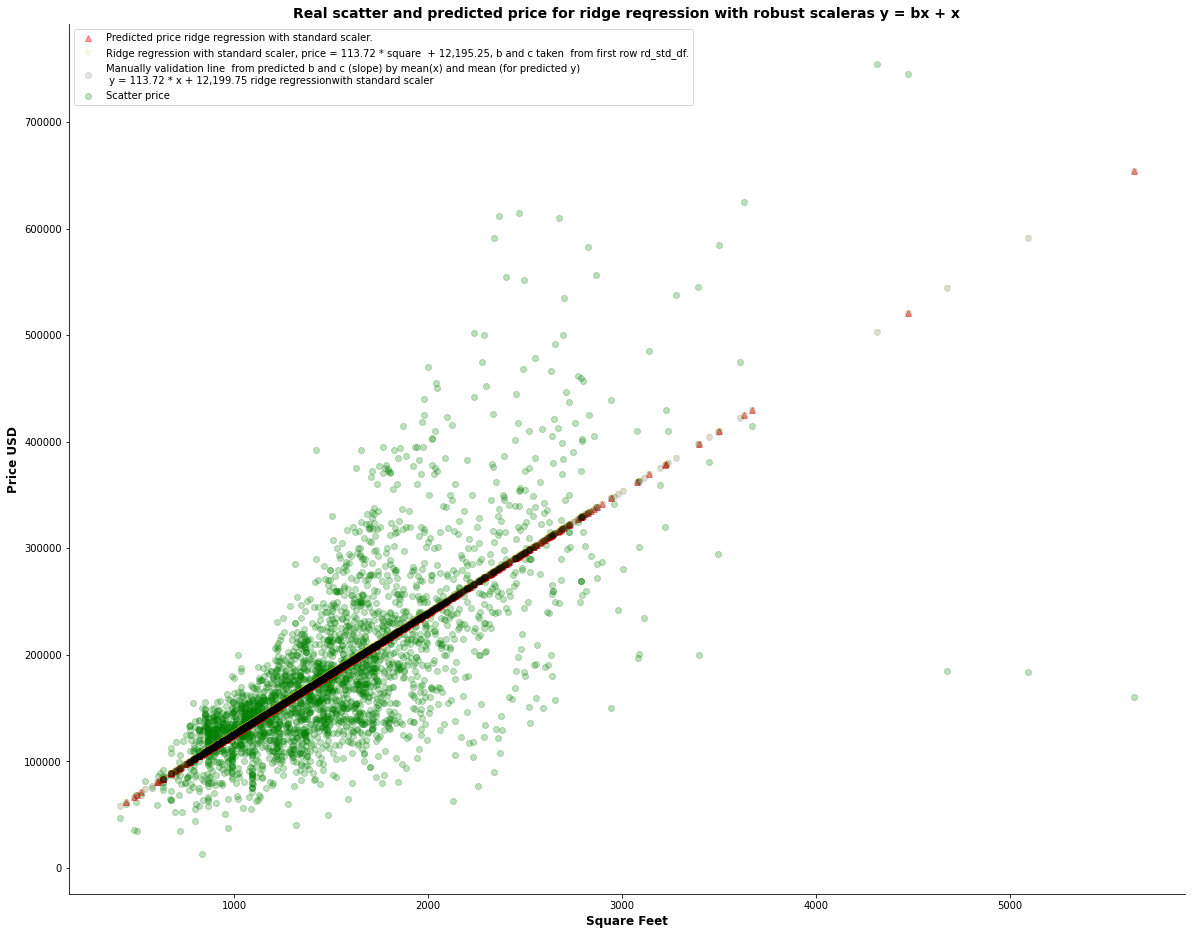

In [17]:
# train models and extract values for rd_std and plotting
rd_std_d = []
# rd_std_square_X
rd_std_square_x = 0
# rd_std_pred_price_y
rd_std_pred_price_y = 0

for i, rd_std_feat in enumerate(rd_std_features):
    
    # row for appending rd_std_d
    r_row = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    if i <= 5:
        r_row[0] = str(len(rd_std_feat)) + " features"
    else:
        r_row[0] = "all ten features"
    
    # Encode X, Y and x 
    rd_std_enc_X = StandardScaler()
    rd_std_X[rd_std_feat] = rd_std_enc_X.fit_transform(rd_std_X[rd_std_feat])
    
    rd_std_enc_x = StandardScaler()
    rd_std_x[rd_std_feat] = rd_std_enc_x.fit_transform(rd_std_x[rd_std_feat])
    
    rd_std_enc_Y = StandardScaler()
    rd_std_Y =  rd_std_enc_Y.fit_transform(rd_std_Y)
    
    rd_std_enc_y = StandardScaler()
    rd_std_y =  rd_std_enc_y.fit_transform(rd_std_y)
    
    # Create ridge regression instance 
    rd_std_ridge = Ridge(alpha = rd_std_alphas[i])
    rd_std_ridge.fit(rd_std_X[rd_std_feat], rd_std_Y)
    
    # predict y and decode it 
    rd_std_y_pred = rd_std_enc_Y.\
        inverse_transform(rd_std_ridge.predict(rd_std_x[rd_std_feat]))
    # Decode back X, Y and x, y
    rd_std_X[rd_std_feat] = rd_std_enc_X.inverse_transform(rd_std_X[rd_std_feat])
    rd_std_Y = rd_std_enc_Y.inverse_transform(rd_std_Y)
    rd_std_x[rd_std_feat] = rd_std_enc_x.inverse_transform(rd_std_x[rd_std_feat])
    rd_std_y = rd_std_enc_y.inverse_transform(rd_std_y)
    # Extract values for plot predicted line
    if i == 0:
        # Replace ridge.coef_[0][0] to 1
        # coef_i0 = rd_std_ridge.coef_[0][0]
        rd_std_square_x = rd_std_x[rd_std_feat].values 
        rd_std_pred_price_y = rd_std_y_pred
        b_1 = round(np.std(rd_std_pred_price_y)\
                      /np.std(rd_std_square_x), 3)
        r_row[i+1] = b_1
        c_1 = np.mean(rd_std_pred_price_y) - b_1*np.mean(rd_std_square_x)
        r_row[7] = c_1
    if i > 0 and i <= 5:
        # rd_std_coef = rd_std_ridge.coef_
        # Replace ridge.coef_ to np.ones
        rd_std_coef = np.ones(i+1)
        for i, val in enumerate(rd_std_coef):
            # Calculate real b = coef * std_y_prdicted /std_X
            rd_std_b = round(val* rd_std_y_pred.std()\
                             /rd_std_x[rd_std_feat].iloc[:,i].values.std(), 3)
            r_row[i+1] = rd_std_b
        # Calculate real slope c = mean(y) - b(j) * mean(x[j]) 
        rd_std_y_mean = rd_std_y_pred.mean()
        for i in range(0,len(rd_std_coef)):
            rd_std_c = rd_std_y_mean - (rd_std_x[rd_std_feat].iloc[:,i]).\
                mean() * r_row[i+1]
        r_row[7] = round(rd_std_c, 2)
        r_row[-1] = rd_std_alphas[i] 
    
    # Calculate R2 RMSE for all features
    r2 = r2_score(rd_std_y, rd_std_y_pred)
    r_row[-3] = round(r2, 3)
    rmse = mean_squared_error(rd_std_y, rd_std_y_pred, squared=False)
    r_row[-2] = round(rmse, 2)
    rd_std_d.append(r_row)
    r_row[-1] = ridge_alphas[i]     

# Create dataframe rd_std_df
rd_std_col = ["x[features]", "b_1", "b_2",	"b_3", "b_4", "b_5","b_6",
               "intercept",	"r_2", "rmse", "alpha"]
rd_std_df = pd.DataFrame(rd_std_d, columns = rd_std_col)

# Visualization data by x = ground living area  and y =  price
fig, ax  = plt.subplots(figsize = (20, 16))
ax.scatter(ames_cp.iloc[:, 0].values, ames_cp.iloc[:,-1].values, c = "g", 
           label = "Scatter price", alpha = 0.25)

# Predicted price line
ax.plot(rd_std_square_x, rd_std_pred_price_y, "r^", alpha = .4, label = "Predicted price \
ridge regression with standard scaler.")

# Line using data from first row dataframe rd_std_df  
b_plot = rd_std_df.iloc[0,1]
c_plot = rd_std_df.iloc[0,7]
x_plot = rd_std.iloc[:,0].values 
ax.plot(x_plot, b_plot * x_plot + c_plot, "yv", alpha = .1, 
        label = "Ridge regression with standard scaler, price = {:.2f} * square  +\
 {:,.2f}, b and c taken  from first row rd_std_df.".format(b_plot, c_plot))


# Calculate b_plot_1  manually -> b_m = sum((x -x(mean)*(y - y(mean))/sum(x-x(mean))^2)
b_plot_1 = round(np.sum((rd_std_pred_price_y - np.mean(rd_std_pred_price_y))\
                         * (rd_std_square_x - np.mean(rd_std_square_x)))\
    /np.sum((rd_std_square_x - np.mean(rd_std_square_x))**2), 2)


# Calculate c_m manually -> c_m = mean(y) - b * mean(x)
c_plot_1 = np.mean(rd_std_pred_price_y) - b_plot_1*(np.mean(rd_std_square_x))
ax.plot(x_plot, b_plot_1*x_plot + c_plot_1, "ko", alpha = .1, 
        label = "Manually validation line  from predicted b and c (slope) by \
mean(x) and mean (for predicted y)\n y = {:.2f} * x + {:,.2f} ridge regression\
with standard scaler".format(b_plot_1, c_plot_1))

ax.set_ylabel("Price USD", fontsize = 12, weight = "bold", rotation = 90)
ax.set_xlabel("Square Feet", fontsize = 12, weight = "bold")
ax.set_title("Real scatter and predicted price for ridge reqression with robust scaler\
as y = bx + x",
             fontsize = 14, weight = "bold")
ax.spines[['top', 'right']].set_visible(False)
ax.legend()
plt.show()

In [18]:
display(rd_std_df)

,x[features],b_1,b_2,b_3,b_4,b_5,b_6,intercept,r_2,rmse,alpha
0,1 features,113.723,0.000,0.000,0.000,0.000,0.000,1.219525e+04,0.503,56314.43,3.199
1,2 features,130.475,2072.285,0.000,0.000,0.000,0.000,1.068313e+05,0.665,46190.76,2.656
2,3 features,130.591,2074.128,3127.629,0.000,0.000,0.000,1.105254e+05,0.678,45314.38,6.136
3,4 features,137.234,2179.627,3286.714,49412.777,0.000,0.000,-1.198202e+05,0.760,39157.32,7.391
4,5 features,138.417,2198.417,3315.047,49838.744,62275.957,0.000,-1.641335e+05,0.761,39043.45,4.642
5,6 features,138.415,2198.385,3314.999,49838.027,62275.061,52107.628,-1.044386e+08,0.761,39046.26,5.094
6,all ten features,0.000,0.000,0.000,0.000,0.000,0.000,0.000000e+00,0.762,38989.98,10.723


**Conclusion**

It can be seen that when replacing Ridge model `coef_` to 1  obtained value `b(slope)`  and `c(intersect)` corresponds to values for simple Linear Regression. On the other hand I can't say whether these values are correct in the case when the quantity of features are greater than one.

## 7.General conclusion

According to the formal metrics R2 and RMSE the Ridge regression provided (when using the right  encoding by StandardScaler used for all data that does not have a large number of outliers) it can be seen that provides greater reliability of  prediction than standard Linear Regression.

Remains the open question   with the correctness of determining the parameters `b(slope)` and `c(intersect)` from Ridge regression model with using StandardScaler. It is necessary to understand whose error is here-either mine (although I have rechecked all the required key arguments for sklearn.linear_model.Ridge) or the model itself, since even if incorrect coding RobustScaler is used  the correct parameter is obtained that matches the predicted values and is validated by plotting predicted line and  the calculation formulas `b(slope) = sum((x -x(mean)*(y - y(mean))/sum(x-x(mean))^2)` and `c(intersect) = mean(y) - sum(b(i) * mean(x))`

Created on July 28, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: Debian 10, Python 3.8.7

See required installed and imported python modules in the cell No 1.